### Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from umap import UMAP
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

%matplotlib inline

In [63]:
# Display all columns

pd.set_option('display.max_columns', None)

### Read data

In [64]:
orig_df = pd.read_csv("./2021-2022_stats_noiso.csv")

In [65]:
orig_df.head(15)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PASSES_MADE,PASSES_RECEIVED,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT_ADJ
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,12.7,0.503,0.259,0.217,8.7,21.7,14.9,6.9,1.1,2.3,11.3,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2,22.6,19.9,0.1,0.2,2.1,2.8,1.4,0.061
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17.6,0.560,0.003,0.518,17.9,22.0,19.9,16.1,1.6,2.7,19.6,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,30.5,19.9,0.2,0.1,4.9,7.7,3.6,0.119
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,21.8,0.608,0.008,0.466,8.7,26.1,17.5,17.5,2.2,2.6,14.4,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,44.9,43.4,0.1,0.4,7.1,8.9,3.9,0.088
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,10.2,0.452,0.364,0.242,9.4,16.1,12.6,7.7,0.8,2.5,9.9,18.4,-0.1,0.4,0.3,0.044,-4.2,-1.5,-5.7,-0.3,9.4,8.8,0,0.1,1.5,1.8,0.8,0.083
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,19.6,0.604,0.100,0.223,7.8,18.7,13.4,6.3,0.6,4.0,8.0,22.4,2.1,1.0,3.1,0.141,1.3,-0.6,0.7,0.7,22.9,21.9,0.1,0.2,2.0,2.4,1.1,0.049
5,Nickeil Alexander-Walker,SG,23,TOT,65,21,22.6,3.9,10.5,0.372,1.6,5.2,0.311,2.3,5.3,0.433,0.449,1.2,1.7,0.743,0.6,2.3,2.9,2.4,0.7,0.4,1.4,1.6,10.6,10.5,0.475,0.497,0.160,2.7,11.5,7.1,16.1,1.5,1.5,11.3,24.1,-1.1,1.1,0.1,0.003,-1.8,-1.1,-2.9,-0.3,28.3,31.8,0.2,0.4,4.5,6.1,3.0,0.106
6,Nickeil Alexander-Walker,SG,23,NOP,50,19,26.3,4.7,12.6,0.375,1.9,6.1,0.311,2.8,6.5,0.434,0.450,1.4,1.9,0.722,0.7,2.6,3.3,2.8,0.8,0.4,1.7,1.8,12.8,10.5,0.474,0.483,0.153,3.0,11.0,6.9,16.1,1.5,1.4,11.2,24.8,-1.1,0.9,-0.1,-0.005,-1.7,-1.3,-3.0,-0.3,28.3,31.8,0.2,0.4,4.5,6.1,3.0,0.106
7,Nickeil Alexander-Walker,SG,23,UTA,15,2,9.9,1.1,3.2,0.333,0.7,2.2,0.303,0.4,1.0,0.400,0.438,0.7,0.8,0.917,0.1,1.5,1.5,1.1,0.3,0.3,0.5,1.0,3.5,10.2,0.497,0.688,0.250,0.8,15.6,8.5,15.5,1.7,2.4,13.1,17.9,0.0,0.2,0.2,0.070,-2.9,1.2,-1.7,0.0,28.3,31.8,0.2,0.4,4.5,6.1,3.0,0.106
8,Grayson Allen,SG,26,MIL,66,61,27.3,3.9,8.6,0.448,2.4,5.9,0.409,1.5,2.7,0.533,0.588,1.0,1.1,0.865,0.5,2.9,3.4,1.5,0.7,0.3,0.7,1.5,11.1,12.7,0.609,0.684,0.130,1.9,10.9,6.5,7.6,1.2,1.0,6.7,15.2,2.8,1.4,4.2,0.110,0.6,-0.2,0.4,1.1,16.8,19.2,0.2,0.3,3.3,4.1,2.0,0.116
9,Jarrett Allen,C,23,CLE,56,56,32.3,6.6,9.7,0.677,0.0,0.2,0.100,6.6,9.6,0.688,0.678,2.9,4.2,0.708,3.4,7.3,10.8,1.6,0.8,1.3,1.7,1.7,16.1,23.0,0.698,0.018,0.428,12.0,24.5,18.4,8.2,1.2,3.7,12.7,18.1,5.4,3.0,8.5,0.225,2.7,1.2,3.9,2.7,35.7,26.0,0.2,0.5,3.3,4.3,2.3,0.064


### Cleaning

In [66]:
# Separate aggregated stats

df_players_in_mult_teams = orig_df[orig_df['Tm']=='TOT']
df_players_in_mult_teams['Player']

5      Nickeil Alexander-Walker
11              Justin Anderson
22                D.J. Augustin
29            Marvin Bagley III
51              DeAndre' Bembry
                 ...           
768              Tremont Waters
776               Derrick White
793             Justise Winslow
801                Moses Wright
805              Thaddeus Young
Name: Player, Length: 97, dtype: object

In [67]:
# Removes players that played in multiple teams from original df

df2 = orig_df[~orig_df['Player'].isin(df_players_in_mult_teams['Player'])]
df2.shape

(508, 57)

In [68]:
# Concatenate back only aggregated stats

df = pd.concat([df2, df_players_in_mult_teams], ignore_index=True)
df.shape

(605, 57)

In [69]:
df[df[' FT_AST']==' None']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PASSES_MADE,PASSES_RECEIVED,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT_ADJ
132,Jaime Echenique,C,24,WAS,1,0,3.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.012,-5.5,-3.0,-8.5,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0
331,Ade Murkey,SG,24,SAC,1,0,1.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-0.017,-7.4,-2.3,-9.7,0.0,0.0,0.0,None,0.0,0.0,0.0,0.0,0.0


In [70]:
# Replace string with NaN and convert column to float

df.loc[df[' FT_AST'] == ' None', ' FT_AST'] = np.nan
df[' FT_AST'] = df[' FT_AST'].astype(float)
df[' FT_AST'].dtypes

dtype('float64')

In [71]:
df.isnull().sum()

Player                   0
Pos                      0
Age                      0
Tm                       0
G                        0
GS                       0
MP                       0
FG                       0
FGA                      0
FG%                      9
3P                       0
3PA                      0
3P%                     44
2P                       0
2PA                      0
2P%                     16
eFG%                     9
FT                       0
FTA                      0
FT%                     59
ORB                      0
DRB                      0
TRB                      0
AST                      0
STL                      0
BLK                      0
TOV                      0
PF                       0
PTS                      0
PER                      0
TS%                      8
3PAr                     9
FTr                      9
ORB%                     0
DRB%                     0
TRB%                     0
AST%                     0
S

In [72]:
#drop nas
# print(df.isnull().sum().sum())
# df = df.dropna()
# print(df.isnull().sum().sum())

df = df.fillna(0)
print(df.isnull().sum().sum())

0


In [73]:
df[df['Player']=='Ivica Zubac']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PASSES_MADE,PASSES_RECEIVED,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT_ADJ
507,Ivica Zubac,C,24,LAC,76,76,24.4,4.1,6.5,0.626,0.0,0.0,0.0,4.1,6.5,0.626,0.626,2.2,3.0,0.727,2.9,5.6,8.5,1.6,0.5,1.0,1.5,2.7,10.3,19.2,0.66,0.0,0.459,12.8,23.7,18.4,9.8,1.0,3.5,16.1,16.8,4.3,2.9,7.2,0.187,-0.1,0.8,0.7,1.3,29.2,19.3,0.1,0.2,2.7,3.9,1.9,0.064


In [74]:
#Separate numerical from labels
labels = ['Player','Pos','Tm']
X = df.drop(labels,axis=1) 
X = X.drop('Age',axis=1) #age not a good data point
Y = df[labels]


In [75]:
# Standardize
X = (X - X.mean()) / (X.std())

In [76]:
#debugging
X.iloc[:,44]

0     -0.614435
1      1.321218
2      1.937107
3     -0.702420
4      0.177423
         ...   
600   -0.526451
601    0.969281
602   -0.350483
603   -0.438467
604    0.353391
Name: VORP, Length: 605, dtype: float64

In [77]:
#debugging
X.shape

(605, 53)

# I'm going to use the dimensionality reduction techniques to see the data with the "traditional positions" as a reference

## PCA

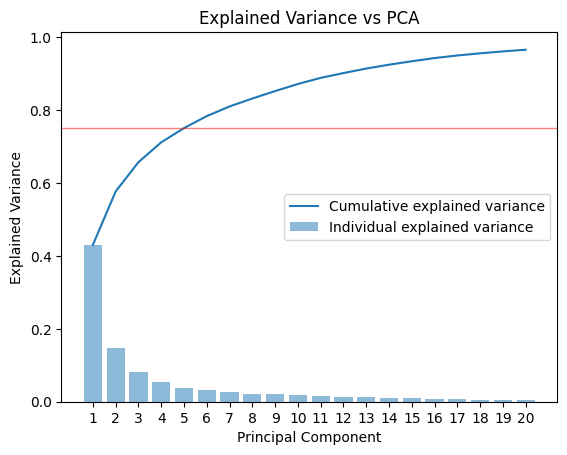

In [78]:
n_components=20
pca = PCA(n_components=n_components)
pca_fit = pca.fit_transform(X)
df_pca = pd.DataFrame(data = pca_fit
             , columns = ['PC '+ str(i+1) for i in range(n_components)])

#help from https://vitalflux.com/pca-explained-variance-concept-python-example/

plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=0.5, align='center',
       label='Individual explained variance')
plt.plot(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_),
        label='Cumulative explained variance')
plt.axhline(y=.75, linewidth=1, color='r', alpha=0.5)
plt.xlabel('Principal Component')
plt.xticks(ticks=range(1,len(pca.explained_variance_ratio_)+1))
plt.ylabel('Explained Variance')
plt.title('Explained Variance vs PCA')
plt.legend(loc='best')
plt.show()

In [79]:
X_pca = PCA(n_components=4).fit_transform(X)
X_pca = pd.DataFrame(data = X_pca)

# sns.pairplot(x_vars=0, y_vars=1, data=X_pca.join(Y), hue="Pos",palette="deep",height=5,aspect=1.2)
# plt.show()

## T-SNE

In [80]:
X_tsne = TSNE(n_components=2, perplexity=40, random_state=1234).fit_transform(X)
X_tsne = pd.DataFrame(data = X_tsne)

# sns.pairplot(x_vars=0, y_vars=1, data=X_tsne.join(Y), hue="Pos",palette="deep",height=5,aspect=1.2)
# plt.show()

## UMAP

In [81]:
X_umap = UMAP(n_components=2, init='random', random_state=1234).fit_transform(X)
X_umap = pd.DataFrame(data = X_umap)

# sns.pairplot(x_vars=0, y_vars=1, data=X_umap.join(Y), hue="Pos",palette="deep",height=5,aspect=1.2)
# plt.show()

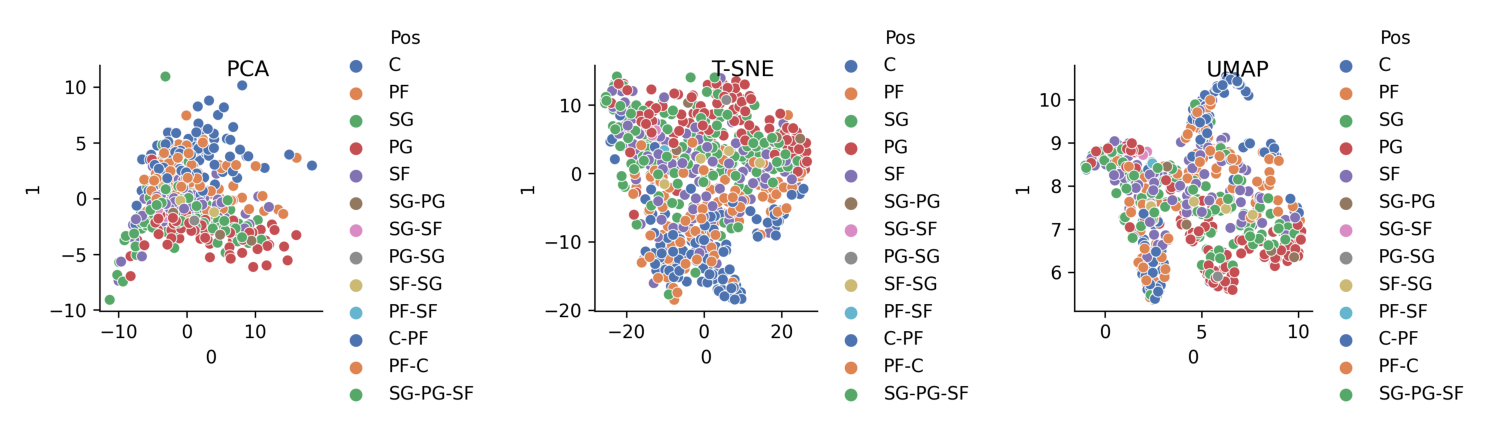

In [82]:
#plot everything using image hack 
#https://stackoverflow.com/questions/61685264/seaborn-plotting-2-pairplots-side-by-side

import matplotlib.image as mpimg

g0=sns.pairplot(x_vars=0, y_vars=1, data=X_pca.join(Y), hue="Pos",palette="deep")
g0.fig.suptitle("PCA")

g1=sns.pairplot(x_vars=0, y_vars=1, data=X_tsne.join(Y), hue="Pos",palette="deep")
g1.fig.suptitle("T-SNE")

g2=sns.pairplot(x_vars=0, y_vars=1, data=X_umap.join(Y), hue="Pos",palette="deep")
g2.fig.suptitle("UMAP")

############### 1. SAVE PLOTS IN MEMORY TEMPORARILY
g0.savefig('g0.png', dpi=300)
plt.close(g0.fig)

g1.savefig('g1.png', dpi=300)
plt.close(g1.fig)

g2.savefig('g2.png', dpi=300)
plt.close(g2.fig)

############### 2. CREATE SUBPLOTS FROM TEMPORAL IMAGES
f, axarr = plt.subplots(1, 3, figsize=(15, 15))

axarr[0].imshow(mpimg.imread('g0.png'))
axarr[1].imshow(mpimg.imread('g1.png'))
axarr[2].imshow(mpimg.imread('g2.png'))

# turn off x and y axis
[ax.set_axis_off() for ax in axarr.ravel()]

plt.tight_layout()
plt.show()

# Well obviously the traditional positions are not very good clusters

So far nothing good, but these are dimensionality reduction techniques, not clustering. Let's cluster on the full data first.

In [83]:
import os
os.environ["OMP_NUM_THREADS"] = '1'
import warnings
warnings.filterwarnings('ignore')

## K-means on full data

In [84]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [85]:
#calculate silhouette scores
silhouette = []

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(X)
    
    score = silhouette_score(X, cluster_labels)
    silhouette.append(score)
    
#calculate silhouette score improvement
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    
kmeans = KMeans(n_clusters = 7, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

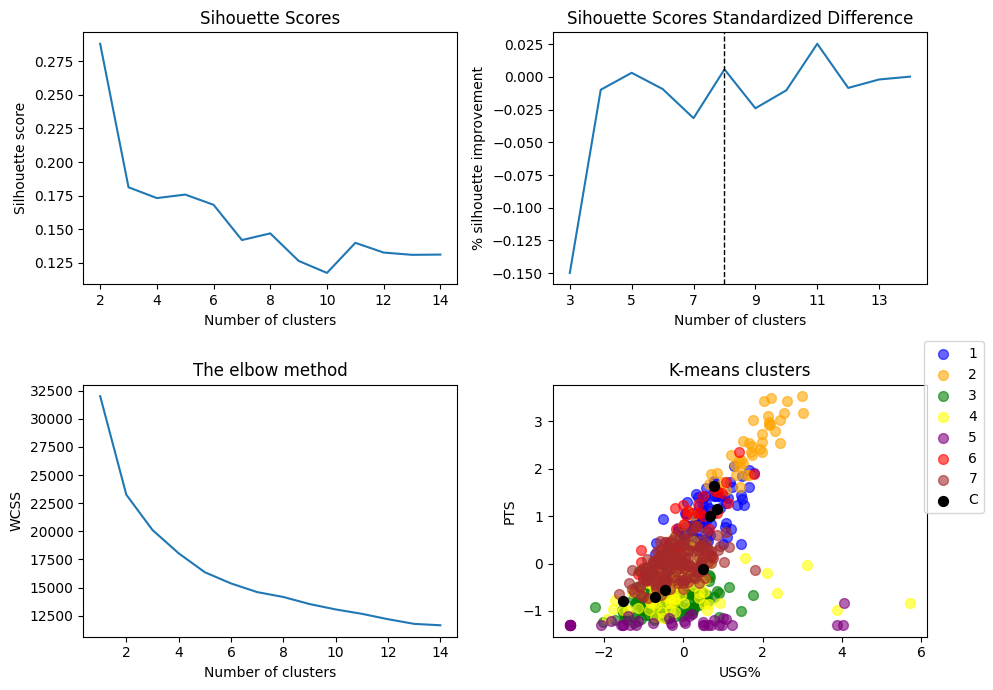

In [86]:
#plot it all

fig, ax = plt.subplots(2, 2, figsize=(10,7))

#Silhouette scores
ax[0,0].plot(range(2, 15), silhouette)
ax[0,0].set_title('Sihouette Scores')
ax[0,0].set_xlabel('Number of clusters')
ax[0,0].set_ylabel('Silhouette score')
ax[0,0].set_xticks(np.arange(2, 15, 2.0))

#Silhouette improvements
ax[0,1].plot(range(3, 15), silhouette_diff)
ax[0,1].axvline(x=8,linewidth=1, linestyle='dashed', color='k')
ax[0,1].set_title('Sihouette Scores Standardized Difference')
ax[0,1].set_xlabel('Number of clusters')
ax[0,1].set_ylabel('% silhouette improvement')
ax[0,1].set_xticks(np.arange(3, 15, 2.0))

#Elbow method
ax[1,0].plot(range(1, 15), wcss) #row=0, col=0
ax[1,0].set_title('The elbow method')
ax[1,0].set_xlabel('Number of clusters')
ax[1,0].set_ylabel('WCSS') #within cluster sum of squares
ax[1,0].set_xticks(np.arange(2, 15, 2.0))

#k-means clusters
ax[1,1].scatter(X.loc[y_kmeans == 0, 'USG%'], X.loc[y_kmeans == 0, 'PTS'], 
                s = 50, alpha=.6, c = 'blue', label = '1')
ax[1,1].scatter(X.loc[y_kmeans == 1, 'USG%'], X.loc[y_kmeans == 1, 'PTS'], 
                s = 50, alpha=.6, c = 'orange', label = '2')
ax[1,1].scatter(X.loc[y_kmeans == 2, 'USG%'], X.loc[y_kmeans == 2, 'PTS'], 
                s = 50, alpha=.6, c = 'green', label = '3')
ax[1,1].scatter(X.loc[y_kmeans == 3, 'USG%'], X.loc[y_kmeans == 3, 'PTS'], 
                s = 50, alpha=.6, c = 'yellow', label = '4')
ax[1,1].scatter(X.loc[y_kmeans == 4, 'USG%'], X.loc[y_kmeans == 4, 'PTS'], 
                s = 50, alpha=.6, c = 'purple', label = '5')
ax[1,1].scatter(X.loc[y_kmeans == 5, 'USG%'], X.loc[y_kmeans == 5, 'PTS'], 
                s = 50, alpha=.6, c = 'red', label = '6')
ax[1,1].scatter(X.loc[y_kmeans == 6, 'USG%'], X.loc[y_kmeans == 6, 'PTS'], 
                s = 50, alpha=.6, c = 'brown', label = '7')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'C')

ax[1,1].set_title('K-means clusters')
ax[1,1].set_xlabel('USG%')
ax[1,1].set_ylabel('PTS')
ax[1,1].legend(bbox_to_anchor=(1.17, 1.2))

fig.tight_layout()
plt.show()

In [40]:
# kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# y_kmeans = kmeans.fit_predict(X)

# #Visualise the clusters
# plt.scatter(X.loc[y_kmeans == 0, 'PER'], X.loc[y_kmeans == 0, 'VORP'], s = 50, alpha=.6, c = 'blue', label = '1')
# plt.scatter(X.loc[y_kmeans == 1, 'PER'], X.loc[y_kmeans == 1, 'VORP'], s = 50, alpha=.6, c = 'orange', label = '2')
# plt.scatter(X.loc[y_kmeans == 2, 'PER'], X.loc[y_kmeans == 2, 'VORP'], s = 50, alpha=.6, c = 'green', label = '3')
# plt.scatter(X.loc[y_kmeans == 3, 'PER'], X.loc[y_kmeans == 3, 'VORP'], s = 50, alpha=.6, c = 'yellow', label = '4')
# plt.scatter(X.loc[y_kmeans == 4, 'PER'], X.loc[y_kmeans == 4, 'VORP'], s = 50, alpha=.6, c = 'purple', label = '5')
# plt.scatter(X.loc[y_kmeans == 5, 'PER'], X.loc[y_kmeans == 5, 'VORP'], s = 50, alpha=.6, c = 'red', label = '6')
# plt.scatter(X.loc[y_kmeans == 6, 'PER'], X.loc[y_kmeans == 6, 'VORP'], s = 50, alpha=.6, c = 'brown', label = '7')
# plt.scatter(X.loc[y_kmeans == 7, 'PER'], X.loc[y_kmeans == 7, 'VORP'], s = 50, alpha=.6, c = 'pink', label = '8')
# plt.scatter(X.loc[y_kmeans == 8, 'PER'], X.loc[y_kmeans == 8, 'VORP'], s = 50, alpha=.6, c = 'teal', label = '9')
# plt.scatter(X.loc[y_kmeans == 9, 'PER'], X.loc[y_kmeans == 9, 'VORP'], s = 50, alpha=.6, c = 'gray', label = '10')
# plt.scatter(X.loc[y_kmeans == 10, 'PER'], X.loc[y_kmeans == 10, 'VORP'], s = 50, alpha=.6, c = 'fuchsia', label = '11')
# plt.scatter(X.loc[y_kmeans == 11, 'PER'], X.loc[y_kmeans == 11, 'VORP'], s = 50, alpha=.6, c = 'lime', label = '12')

#Plot clusters centroids 
# plt.scatter(kmeans.cluster_centers_[:, 25], kmeans.cluster_centers_[:,44], #column numbers for PER and VORP
#             s = 50, c = 'black', label = 'Centroids')

# plt.legend()
# plt.title('K-means clusters')
# plt.xlabel('PER')
# plt.ylabel('VORP')
#plt.show()

## Crap
It's hard to find what dimensions to cluster on when there are so many features. Let's use dimensionality reduction.

## K-Means + PCA

In [91]:
#calculate within-cluster sum of squares for elbow method
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

In [100]:
#calculate silhouette scores
silhouette = []

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(X_pca)
    
    score = silhouette_score(X_pca, cluster_labels)
    silhouette.append(score)
    
#calculate silhouette score improvement
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)

#k-means clustering
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_pca)
Y['PCA-cluster']=y_kmeans

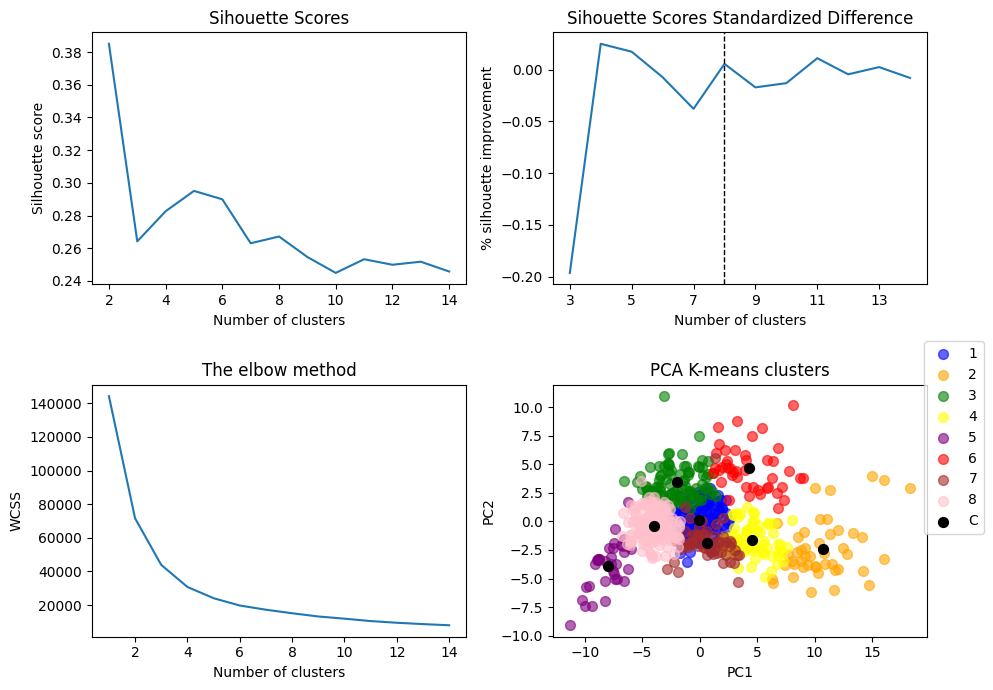

In [103]:
#plot it all

fig, ax = plt.subplots(2, 2, figsize=(10,7))

#Silhouette scores
ax[0,0].plot(range(2, 15), silhouette)
ax[0,0].set_title('Sihouette Scores')
ax[0,0].set_xlabel('Number of clusters')
ax[0,0].set_ylabel('Silhouette score')
ax[0,0].set_xticks(np.arange(2, 15, 2.0))

#Silhouette improvements
ax[0,1].plot(range(3, 15), silhouette_diff)
ax[0,1].axvline(x=8,linewidth=1, linestyle='dashed', color='k')
ax[0,1].set_title('Sihouette Scores Standardized Difference')
ax[0,1].set_xlabel('Number of clusters')
ax[0,1].set_ylabel('% silhouette improvement')
ax[0,1].set_xticks(np.arange(3, 15, 2.0))

#Elbow method
ax[1,0].plot(range(1, 15), wcss) #row=0, col=0
ax[1,0].set_title('The elbow method')
ax[1,0].set_xlabel('Number of clusters')
ax[1,0].set_ylabel('WCSS') #within cluster sum of squares
ax[1,0].set_xticks(np.arange(2, 15, 2.0))

#k-means clusters
ax[1,1].scatter(X_pca.loc[y_kmeans == 0, 0], X_pca.loc[y_kmeans == 0, 1], 
                s = 50, alpha=.6, c = 'blue', label = '1')
ax[1,1].scatter(X_pca.loc[y_kmeans == 1, 0], X_pca.loc[y_kmeans == 1, 1], 
                s = 50, alpha=.6, c = 'orange', label = '2')
ax[1,1].scatter(X_pca.loc[y_kmeans == 2, 0], X_pca.loc[y_kmeans == 2, 1], 
                s = 50, alpha=.6, c = 'green', label = '3')
ax[1,1].scatter(X_pca.loc[y_kmeans == 3, 0], X_pca.loc[y_kmeans == 3, 1], 
                s = 50, alpha=.6, c = 'yellow', label = '4')
ax[1,1].scatter(X_pca.loc[y_kmeans == 4, 0], X_pca.loc[y_kmeans == 4, 1], 
                s = 50, alpha=.6, c = 'purple', label = '5')
ax[1,1].scatter(X_pca.loc[y_kmeans == 5, 0], X_pca.loc[y_kmeans == 5, 1], 
                s = 50, alpha=.6, c = 'red', label = '6')
ax[1,1].scatter(X_pca.loc[y_kmeans == 6, 0], X_pca.loc[y_kmeans == 6, 1], 
                s = 50, alpha=.6, c = 'brown', label = '7')
ax[1,1].scatter(X_pca.loc[y_kmeans == 7, 0], X_pca.loc[y_kmeans == 7, 1], 
                s = 50, alpha=.6, c = 'pink', label = '8')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'C')

ax[1,1].set_title('PCA K-means clusters')
ax[1,1].set_xlabel('PC1')
ax[1,1].set_ylabel('PC2')
ax[1,1].legend(bbox_to_anchor=(1.17, 1.2))

fig.tight_layout()
plt.show()

## Not bad

We'll have to do some more digging into what those clusters are but the K-means+PCA seems to work well.

## K-means + T-SNE

In [104]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_tsne)
    wcss.append(kmeans.inertia_)

In [105]:
#calculate silhouette scores
silhouette = []

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(X_tsne)
    
    score = silhouette_score(X_tsne, cluster_labels)
    silhouette.append(score)
    
#calculate silhouette score improvement
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    
kmeans = KMeans(n_clusters = 8, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_tsne)
Y['tSNE-cluster']=y_kmeans

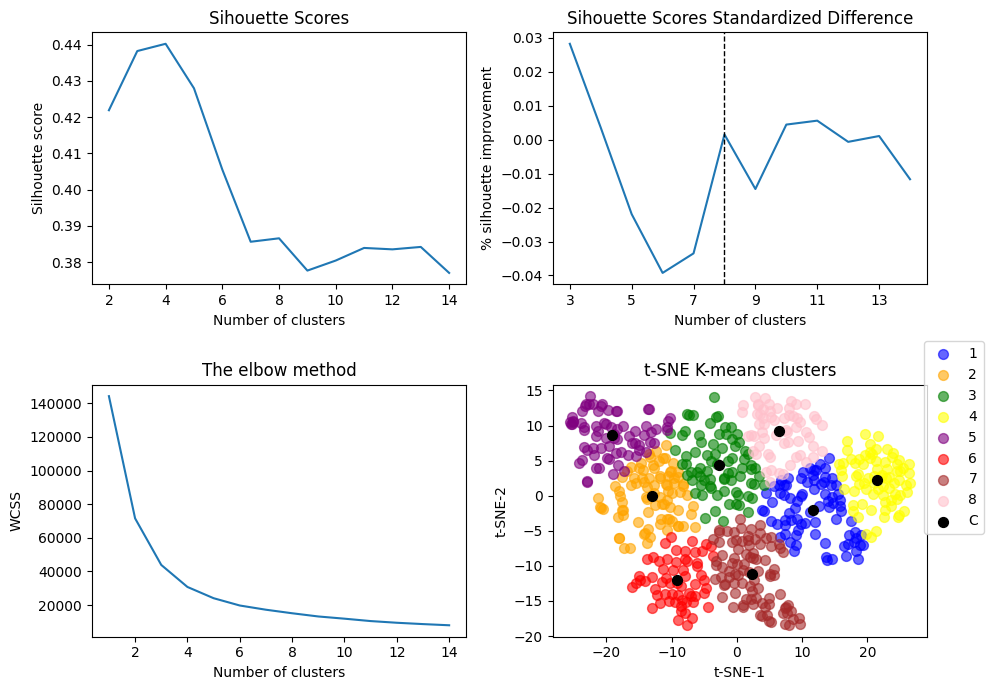

In [106]:
#plot it all

fig, ax = plt.subplots(2, 2, figsize=(10,7))

#Silhouette scores
ax[0,0].plot(range(2, 15), silhouette)
ax[0,0].set_title('Sihouette Scores')
ax[0,0].set_xlabel('Number of clusters')
ax[0,0].set_ylabel('Silhouette score')
ax[0,0].set_xticks(np.arange(2, 15, 2.0))

#Silhouette improvements
ax[0,1].plot(range(3, 15), silhouette_diff)
ax[0,1].axvline(x=8,linewidth=1, linestyle='dashed', color='k')
ax[0,1].set_title('Sihouette Scores Standardized Difference')
ax[0,1].set_xlabel('Number of clusters')
ax[0,1].set_ylabel('% silhouette improvement')
ax[0,1].set_xticks(np.arange(3, 15, 2.0))

#Elbow method
ax[1,0].plot(range(1, 15), wcss) #row=0, col=0
ax[1,0].set_title('The elbow method')
ax[1,0].set_xlabel('Number of clusters')
ax[1,0].set_ylabel('WCSS') #within cluster sum of squares
ax[1,0].set_xticks(np.arange(2, 15, 2.0))

#k-means clusters
ax[1,1].scatter(X_tsne.loc[y_kmeans == 0, 0], X_tsne.loc[y_kmeans == 0, 1], 
                s = 50, alpha=.6, c = 'blue', label = '1')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 1, 0], X_tsne.loc[y_kmeans == 1, 1], 
                s = 50, alpha=.6, c = 'orange', label = '2')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 2, 0], X_tsne.loc[y_kmeans == 2, 1], 
                s = 50, alpha=.6, c = 'green', label = '3')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 3, 0], X_tsne.loc[y_kmeans == 3, 1], 
                s = 50, alpha=.6, c = 'yellow', label = '4')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 4, 0], X_tsne.loc[y_kmeans == 4, 1], 
                s = 50, alpha=.6, c = 'purple', label = '5')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 5, 0], X_tsne.loc[y_kmeans == 5, 1], 
                s = 50, alpha=.6, c = 'red', label = '6')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 6, 0], X_tsne.loc[y_kmeans == 6, 1], 
                s = 50, alpha=.6, c = 'brown', label = '7')
ax[1,1].scatter(X_tsne.loc[y_kmeans == 7, 0], X_tsne.loc[y_kmeans == 7, 1], 
                s = 50, alpha=.6, c = 'pink', label = '8')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'C')

ax[1,1].set_title('t-SNE K-means clusters')
ax[1,1].set_xlabel('t-SNE-1')
ax[1,1].set_ylabel('t-SNE-2')
ax[1,1].legend(bbox_to_anchor=(1.17, 1.2))

fig.tight_layout()
plt.show()

## Even better!

## K-means + UMAP

In [107]:
wcss = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_umap)
    wcss.append(kmeans.inertia_)

In [111]:
#calculate silhouette scores
silhouette = []

for n_clusters in range(2, 15):
    kmeans = KMeans(n_clusters = n_clusters, random_state = 99)
    cluster_labels = kmeans.fit_predict(X_umap)
    
    score = silhouette_score(X_umap, cluster_labels)
    silhouette.append(score)
    
#calculate silhouette score improvement
silhouette_diff = []

for i in range(1, len(silhouette)):
    improvement = 1 - ((1 - silhouette[i]) / (1 - silhouette[i - 1]))
    silhouette_diff.append(improvement)
    
kmeans = KMeans(n_clusters = 9, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_umap)
Y['UMAP-cluster']=y_kmeans

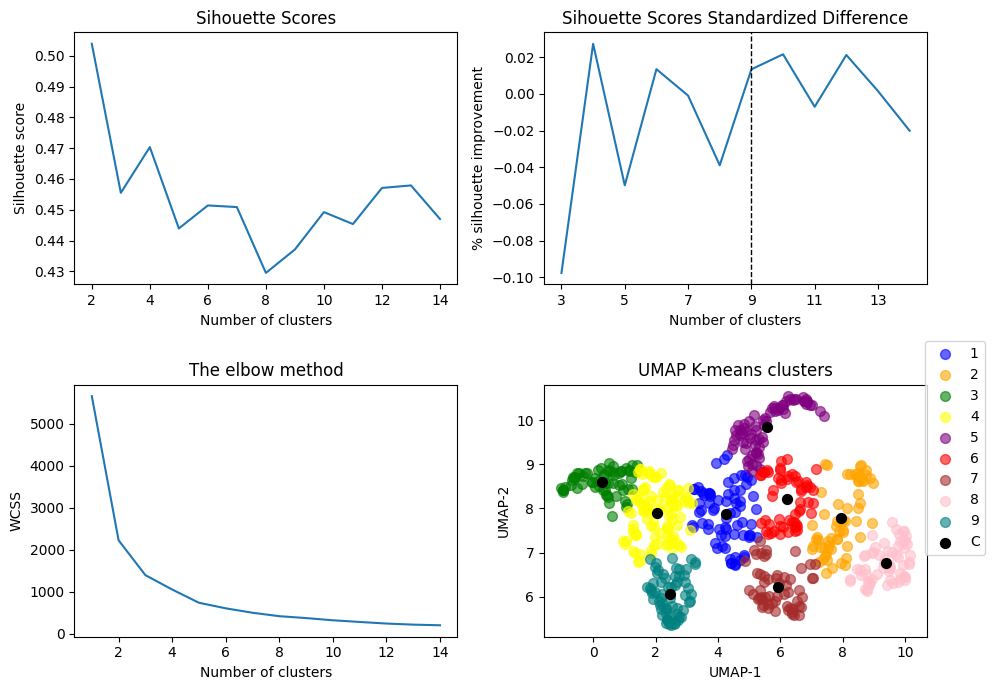

In [112]:
#plot it all

fig, ax = plt.subplots(2, 2, figsize=(10,7))

#Silhouette scores
ax[0,0].plot(range(2, 15), silhouette)
ax[0,0].set_title('Sihouette Scores')
ax[0,0].set_xlabel('Number of clusters')
ax[0,0].set_ylabel('Silhouette score')
ax[0,0].set_xticks(np.arange(2, 15, 2.0))

#Silhouette improvements
ax[0,1].plot(range(3, 15), silhouette_diff)
ax[0,1].axvline(x=9,linewidth=1, linestyle='dashed', color='k')
ax[0,1].set_title('Sihouette Scores Standardized Difference')
ax[0,1].set_xlabel('Number of clusters')
ax[0,1].set_ylabel('% silhouette improvement')
ax[0,1].set_xticks(np.arange(3, 15, 2.0))

#Elbow method
ax[1,0].plot(range(1, 15), wcss) #row=0, col=0
ax[1,0].set_title('The elbow method')
ax[1,0].set_xlabel('Number of clusters')
ax[1,0].set_ylabel('WCSS') #within cluster sum of squares
ax[1,0].set_xticks(np.arange(2, 15, 2.0))

#k-means clusters
ax[1,1].scatter(X_umap.loc[y_kmeans == 0, 0], X_umap.loc[y_kmeans == 0, 1], 
                s = 50, alpha=.6, c = 'blue', label = '1')
ax[1,1].scatter(X_umap.loc[y_kmeans == 1, 0], X_umap.loc[y_kmeans == 1, 1], 
                s = 50, alpha=.6, c = 'orange', label = '2')
ax[1,1].scatter(X_umap.loc[y_kmeans == 2, 0], X_umap.loc[y_kmeans == 2, 1], 
                s = 50, alpha=.6, c = 'green', label = '3')
ax[1,1].scatter(X_umap.loc[y_kmeans == 3, 0], X_umap.loc[y_kmeans == 3, 1], 
                s = 50, alpha=.6, c = 'yellow', label = '4')
ax[1,1].scatter(X_umap.loc[y_kmeans == 4, 0], X_umap.loc[y_kmeans == 4, 1], 
                s = 50, alpha=.6, c = 'purple', label = '5')
ax[1,1].scatter(X_umap.loc[y_kmeans == 5, 0], X_umap.loc[y_kmeans == 5, 1], 
                s = 50, alpha=.6, c = 'red', label = '6')
ax[1,1].scatter(X_umap.loc[y_kmeans == 6, 0], X_umap.loc[y_kmeans == 6, 1], 
                s = 50, alpha=.6, c = 'brown', label = '7')
ax[1,1].scatter(X_umap.loc[y_kmeans == 7, 0], X_umap.loc[y_kmeans == 7, 1], 
                s = 50, alpha=.6, c = 'pink', label = '8')
ax[1,1].scatter(X_umap.loc[y_kmeans == 8, 0], X_umap.loc[y_kmeans == 8, 1], 
                s = 50, alpha=.6, c = 'teal', label = '9')
ax[1,1].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 50, c = 'black', label = 'C')

ax[1,1].set_title('UMAP K-means clusters')
ax[1,1].set_xlabel('UMAP-1')
ax[1,1].set_ylabel('UMAP-2')
ax[1,1].legend(bbox_to_anchor=(1.17, 1.2))

fig.tight_layout()
plt.show()

# OK THEN!
It seems K-means works really well on the scaled data. I've provided the code for any # of cluster up to 12, but we can tune that number as we move on. Let's see how many clusters the unsupervised algorithms find.... 

## DBSCAN on full data

In [113]:
nbrs = NearestNeighbors(n_neighbors=106).fit(X) #n_neighbors = min_points which = 2*dimensions
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 105]

clusters = DBSCAN(eps=9, min_samples=106).fit(X)

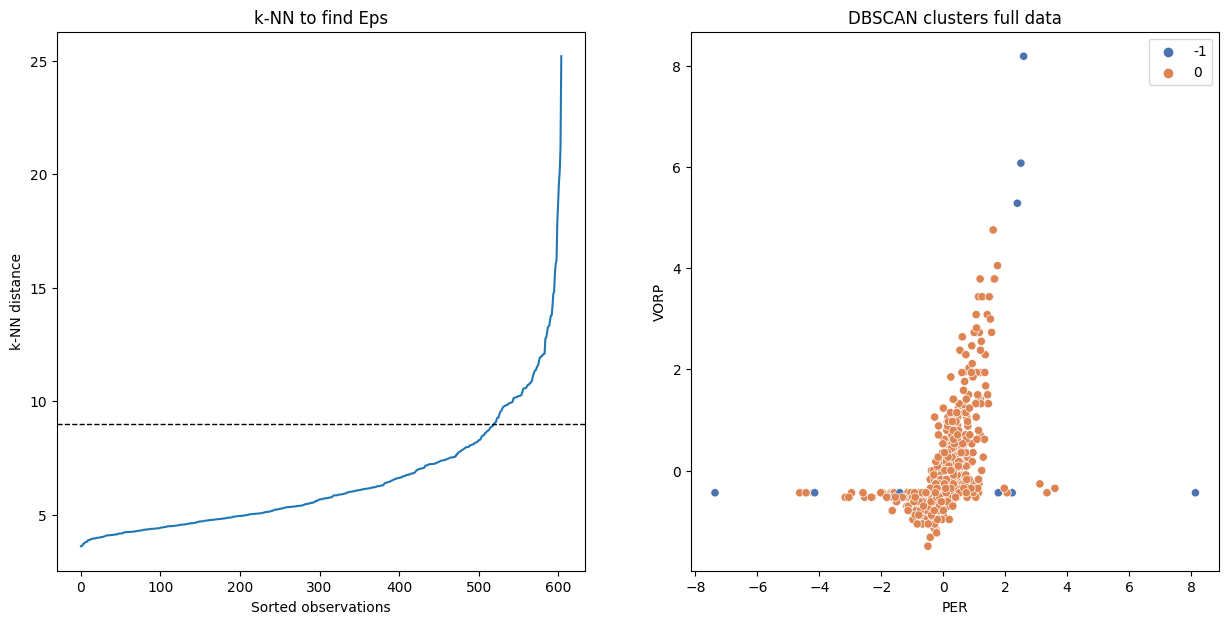

In [114]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(k_dist)
ax[0].axhline(y=9, linewidth=1, linestyle='dashed', color='k')
ax[0].set_ylabel("k-NN distance")
ax[0].set_xlabel("Sorted observations")
ax[0].set_title('k-NN to find Eps')

p=sns.scatterplot(data=X, x="PER", y="VORP", hue=clusters.labels_, legend="full", palette="deep", ax=ax[1])
ax[1].set_title('DBSCAN clusters full data')

# turn off x and y axis
#[ax.set_axis_off() for ax in axarr.ravel()]

plt.show()

## DBSCAN + PCA

In [115]:
nbrs = NearestNeighbors(n_neighbors=8).fit(X_pca) #n_neighbors = min_points which = 2*dimensions
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_pca)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 7]
clusters = DBSCAN(eps=4, min_samples=8).fit(X_pca)

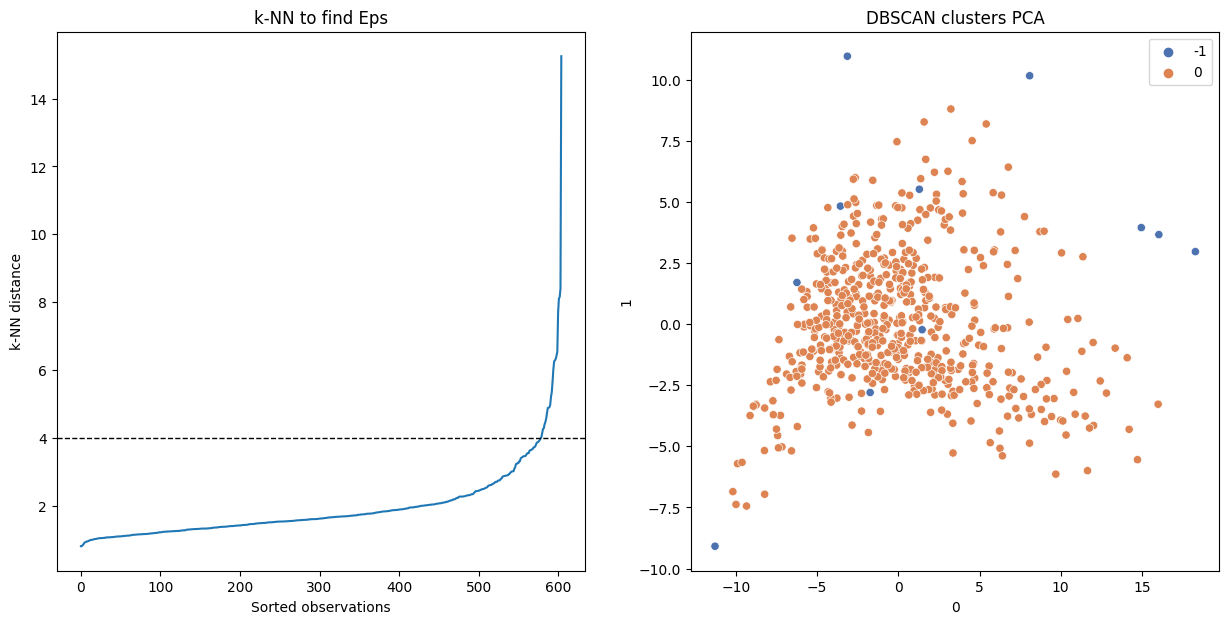

In [116]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(k_dist)
ax[0].axhline(y=4, linewidth=1, linestyle='dashed', color='k')
ax[0].set_ylabel("k-NN distance")
ax[0].set_xlabel("Sorted observations")
ax[0].set_title('k-NN to find Eps')

p=sns.scatterplot(data=X_pca, x=0, y=1, hue=clusters.labels_, legend="full", palette="deep", ax=ax[1])
ax[1].set_title('DBSCAN clusters PCA')

# turn off x and y axis
#[ax.set_axis_off() for ax in axarr.ravel()]

plt.show()

# DBSCAN + T-SNE

In [117]:
nbrs = NearestNeighbors(n_neighbors=4).fit(X_tsne) #n_neighbors = min_points which = 2*dimensions
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_tsne)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 3]

clusters = DBSCAN(eps=2, min_samples=4).fit(X_tsne)

Text(0.5, 1.0, 'DBSCAN clusters t-SNE')

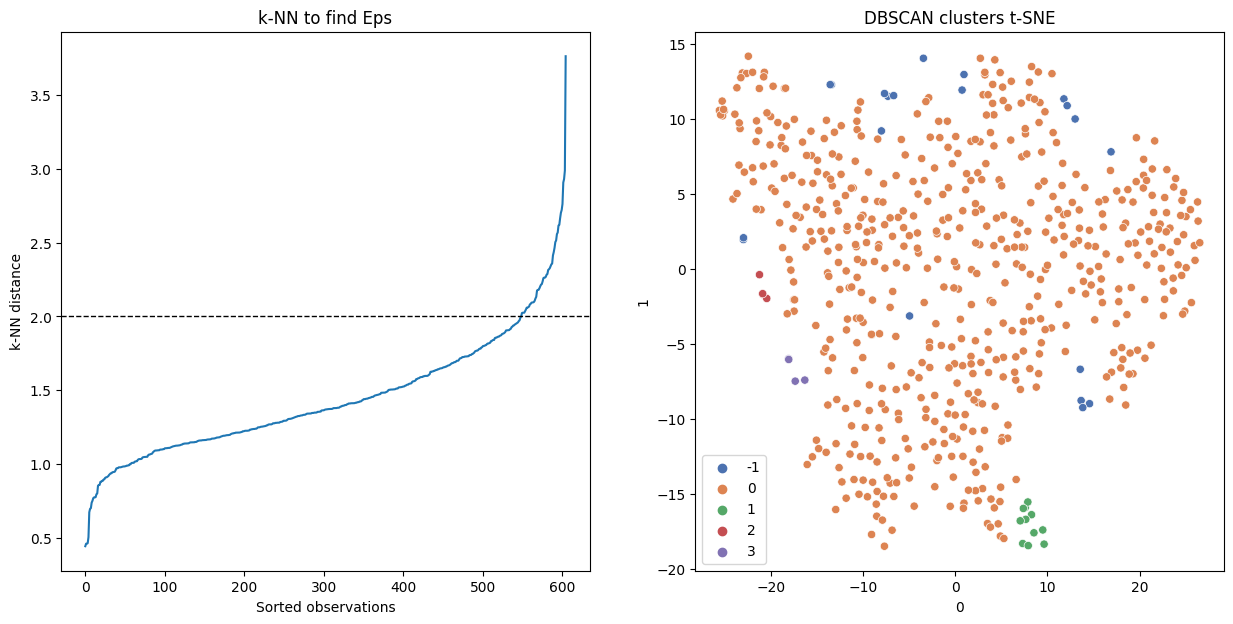

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(k_dist)
ax[0].axhline(y=2, linewidth=1, linestyle='dashed', color='k')
ax[0].set_ylabel("k-NN distance")
ax[0].set_xlabel("Sorted observations")
ax[0].set_title('k-NN to find Eps')

p=sns.scatterplot(data=X_tsne, x=0, y=1, hue=clusters.labels_, legend="full", palette="deep", ax=ax[1])
ax[1].set_title('DBSCAN clusters t-SNE')

## DBSCAN + UMAP

In [119]:
nbrs = NearestNeighbors(n_neighbors=4).fit(X_umap) #n_neighbors = min_points which = 2*dimensions
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(X_umap)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis=0)

k_dist = sort_neigh_dist[:, 3]

clusters = DBSCAN(eps=.35, min_samples=4).fit(X_umap)

Text(0.5, 1.0, 'DBSCAN clusters UMAP')

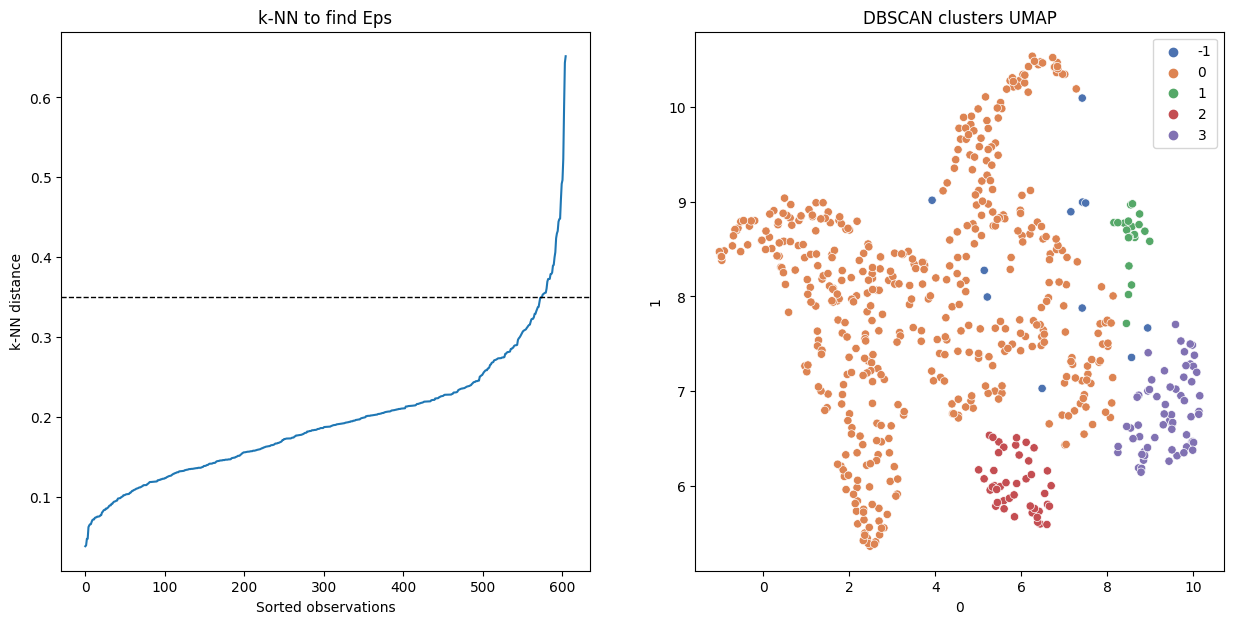

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

ax[0].plot(k_dist)
ax[0].axhline(y=.35, linewidth=1, linestyle='dashed', color='k')
ax[0].set_ylabel("k-NN distance")
ax[0].set_xlabel("Sorted observations")
ax[0].set_title('k-NN to find Eps')

p=sns.scatterplot(data=X_umap, x=0, y=1, hue=clusters.labels_, legend="full", palette="deep", ax=ax[1])
ax[1].set_title('DBSCAN clusters UMAP')

# WHAT WE'VE LEARNED SO FAR
-DBSCAN struggles<br>
-K-means looks good on everything except the full data <br>
-If we want this to be "interpretable" so that we can relate the results to players and stuff, we might be left with PCA and K-means

# Build a DF of players and clusters

In [121]:
df_full=df.join(Y[['PCA-cluster','tSNE-cluster','UMAP-cluster']])
df_full.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PASSES_MADE,PASSES_RECEIVED,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT_ADJ,PCA-cluster,tSNE-cluster,UMAP-cluster
0,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1,12.7,0.503,0.259,0.217,8.7,21.7,14.9,6.9,1.1,2.3,11.3,18.5,0.4,2.1,2.5,0.070,-2.0,-0.6,-2.6,-0.2,22.6,19.9,0.1,0.2,2.1,2.8,1.4,0.061,0,6,4
1,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9,17.6,0.560,0.003,0.518,17.9,22.0,19.9,16.1,1.6,2.7,19.6,12.0,3.8,3.0,6.8,0.163,1.0,1.0,2.0,2.0,30.5,19.9,0.2,0.1,4.9,7.7,3.6,0.119,5,6,4
2,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1,21.8,0.608,0.008,0.466,8.7,26.1,17.5,17.5,2.2,2.6,14.4,25.0,3.6,3.5,7.2,0.188,1.7,2.1,3.8,2.7,44.9,43.4,0.1,0.4,7.1,8.9,3.9,0.088,5,3,1
3,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1,10.2,0.452,0.364,0.242,9.4,16.1,12.6,7.7,0.8,2.5,9.9,18.4,-0.1,0.4,0.3,0.044,-4.2,-1.5,-5.7,-0.3,9.4,8.8,0.0,0.1,1.5,1.8,0.8,0.083,7,5,8
4,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9,19.6,0.604,0.100,0.223,7.8,18.7,13.4,6.3,0.6,4.0,8.0,22.4,2.1,1.0,3.1,0.141,1.3,-0.6,0.7,0.7,22.9,21.9,0.1,0.2,2.0,2.4,1.1,0.049,5,6,4


In [122]:
#df_full.to_csv("./stats_with_clusters.csv",index=False)

# Group by cluster with average stats for each

In [123]:
# List of dfs grouped by each cluster method
lst = [df_full.groupby('PCA-cluster').mean(),
       df_full.groupby('tSNE-cluster').mean(),
       df_full.groupby('UMAP-cluster').mean()]

In [124]:
# New dataframe
df_cluster = (pd.concat(lst, axis=0, keys=['PCA', 'tSNE', 'UMAP'])
              .drop(['PCA-cluster', 'tSNE-cluster', 'UMAP-cluster'], axis=1)
              .reset_index()
              .rename(columns={'level_0': 'type', 'level_1': 'cluster'}))

In [125]:
df_cluster.sample(10)

,type,cluster,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,PASSES_MADE,PASSES_RECEIVED,FT_AST,SECONDARY_AST,POTENTIAL_AST,AST_POINTS_CREATED,AST_ADJ,AST_TO_PASS_PCT_ADJ
19,UMAP,3,24.890000,25.990000,1.770000,10.149000,1.224000,2.970000,0.441320,0.531000,1.608000,0.318630,0.694000,1.365000,0.535460,0.528690,0.407000,0.565000,0.615840,0.370000,1.153000,1.519000,0.677000,0.283000,0.126000,0.383000,0.910000,3.394000,11.021000,0.550290,0.520610,0.191060,3.796000,11.993000,7.896000,9.650000,1.325000,1.050000,10.378000,15.899000,0.099000,0.252000,0.354000,0.075180,-2.227000,-0.486000,-2.709000,-7.400000e-02,9.673000,9.008000,0.075000,0.096000,1.342000,1.789000,0.848000,0.095570
20,UMAP,4,25.690141,55.422535,23.887324,20.585915,3.473239,6.340845,0.552887,0.428169,1.316901,0.258211,3.050704,5.015493,0.604056,0.585169,1.485915,2.107042,0.703479,1.897183,3.891549,5.784507,1.277465,0.576056,0.787324,1.001408,2.221127,8.845070,17.281690,0.611028,0.199676,0.342070,9.840845,20.400000,15.102817,9.376056,1.376056,3.487324,12.300000,17.602817,2.097183,1.429577,3.535211,0.140028,-0.264789,0.187324,-0.070423,6.591549e-01,22.059155,17.515493,0.097183,0.161972,2.353521,3.291549,1.532394,0.067803
13,tSNE,5,24.950820,24.819672,3.311475,10.152459,1.427869,2.796721,0.512230,0.113115,0.444262,0.129508,1.318033,2.357377,0.553361,0.529016,0.724590,1.067213,0.624475,1.131148,1.996721,3.129508,0.480328,0.327869,0.388525,0.511475,1.316393,3.675410,15.121311,0.563148,0.142967,0.414852,12.922951,21.816393,17.340984,6.604918,1.590164,3.922951,14.675410,17.127869,0.332787,0.360656,0.706557,0.109361,-2.281967,-0.052459,-2.337705,-1.820038e-18,10.095082,7.150820,0.042623,0.059016,0.932787,1.240984,0.581967,0.054082
1,PCA,1,27.444444,60.044444,59.333333,34.617778,7.964444,17.120000,0.464644,2.055556,5.800000,0.342867,5.906667,11.324444,0.519067,0.524222,4.326667,5.264444,0.824267,1.022222,5.340000,6.355556,6.433333,1.222222,0.537778,3.020000,2.420000,22.308889,20.384444,0.571556,0.337733,0.306467,3.260000,16.786667,10.040000,30.184444,1.726667,1.422222,13.884444,28.084444,3.797778,2.311111,6.111111,0.134600,3.215556,0.302222,3.526667,3.075556e+00,52.077778,61.264444,0.677778,0.808889,12.182222,16.580000,7.888889,0.152778
23,UMAP,7,26.887097,61.870968,58.354839,33.645161,7.296774,15.988710,0.453452,2.072581,5.825806,0.347306,5.220968,10.162903,0.508371,0.519468,3.740323,4.554839,0.820129,0.895161,4.767742,5.656452,6.011290,1.169355,0.495161,2.751613,2.345161,20.406452,18.800000,0.563597,0.371258,0.279968,2.917742,15.283871,9.122581,28.487097,1.698387,1.343548,13.559677,26.596774,3.232258,2.225806,5.464516,0.120903,2.414516,0.175806,2.595161,2.538710e+00,50.838710,59.317742,0.622581,0.780645,11.393548,15.490323,7.372581,0.145839
8,tSNE,0,26.341463,66.512195,47.682927,28.745122,4.846341,10.591463,0.458780,1.774390,4.818293,0.372976,3.067073,5.778049,0.532902,0.545585,1.792683,2.273171,0.789561,1.128049,4.084146,5.218293,2.092683,0.865854,0.587805,1.240244,2.189024,13.257317,14.606098,0.574939,0.468317,0.211341,4.212195,15.419512,9.824390,10.868293,1.478049,1.873171,9.698780,19.189024,2.148780,1.957317,4.104878,0.103866,0.163415,0.032927,0.195122,1.047561e+00,29.662195,28.307317,0.200000,0.312195,3.878049,5.398780,2.586585,0.089122
6,PCA,6,26.293103,42.137931,9.379310,19.489655,2.686207,6.510345,0.423431,0.808621,2.579310,0.295862,1.891379,3.929310,0.499052,0.484466,1.037931,1.331034,0.757431,0.446552,1.974138,2.422414,3.187931,0.837931,0.256897,1.291379,1.606897,7.234483,13.581034,0.518466,0.396069,0.209328,2.427586,10.875862,6.639655,23.970690,2.103448,1.150000,15.160345,19.315517,0.231034,0.750000,0.975862,0.077414,-1.272414,0.275862,-1.001724,3.793103e-02,30.750000,32.256897,0.348276,0.317241,6.137931,8.384483,3.850000,0.141776
16,UMAP,0,26.083333,44.125000,8.972222,18.316667,2.359722,5.687500,0.421375,0.905556,2.781944,0.3

In [126]:
#df_cluster.to_csv("clustered_stats.csv", index=False)

Just messing around..

In [ ]:
df_cluster[df_cluster['type']=='PCA'].sort_values(by=['3P'])

In [ ]:
df_full[df_full['PCA-cluster']==2]